The main objective of the notebook is to build a classification model using bag of words features

**Import libraries**

In [1]:
import pandas as pd                                         #data processing
import re                                                   #regular expression for data cleaning
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk                                                 #natural language toolkit
from nltk.corpus import stopwords                           #stopwords
from nltk.stem import WordNetLemmatizer                     #text normalization
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

Reading .csv

In [2]:
data=pd.read_csv("tweets.csv") 

Let us print information about a dataframe including the index, dtype and column dtypes.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


Display first 5 rows

In [7]:
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


check for null values since machine learning algorithm do not suppport data with missing values

In [8]:
data.isnull().sum() #check for the null values

label    0
tweet    0
dtype: int64

Dropping out the column with ID since it doesn't contribute to the output

In [9]:
data = data.drop(['id'],axis=1) #drop unnecessary columns

KeyError: "['id'] not found in axis"

Understanding the class distribution helps in knowing whether the dataset is balanced or not.

<AxesSubplot:>

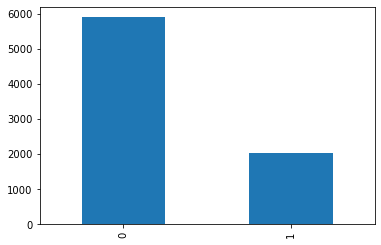

In [10]:
data['label'].value_counts().plot(kind='bar')

Lets us understand the proportion of each class

In [11]:
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

We can infer that the given problem is a class imbalance problem

**Pre Processing the text**

1.The raw data is messy. It contains hashtags, user mentions, non ascii characters, punctuations, numbers, html entities, extra spaces, misspelled words,etc.

2.So, Data Pre-processing is the most important step prior to the model building in which we remove all the unnecessary qualities from the data.

Let us look at some of the examples

Contraction mapping : expanding the shortened versions or contraction of words using contraction dictionary

In [11]:
data.tweet[24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [12]:
newString=re.sub(r"'s\b"," is",data.tweet[24])  #converting It's to It is
newString

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

Removing user mention

In [13]:
data.tweet[11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [14]:
newString=re.sub(r'@[A-Za-z0-9]+','',data.tweet[11])
print(newString)

Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade


Removing hashtag symbol

In [15]:
data.tweet[0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [16]:
newString=re.sub("#","",data.tweet[0])
print(newString)

fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone


Removal of links

In [17]:
data.tweet[1]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [18]:
newString=re.sub(r'http\S+', '', data.tweet[1])
newString

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… '

Removing special characters, punctuations, numbers

In [19]:
data.tweet[25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [20]:
newString=re.sub("[^a-zA-Z]", " ", data.tweet[25])
newString

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

Removal of stop words:

Stop words usually refers to the most commonly used words in a language (such as “the”, “a”, “an”, “in”) 

This step is a one of the important steps to come up with more robust input

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
len(stop_words)

179

In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Text Normalization

There are 2 types of normalization techniques.

1.*Stemming* is the process of converting the words of a sentence to its non-changing portions. 

For example, given the words of amusing, amusement, and amused, the stem would be amus.

2.*Lemmatization* is the process of converting the words of a sentence to its dictionary form.

For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse.

I prefer Lemmatization over Stemming since lemma results in dictionary form.


In [14]:
data.tweet[63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [15]:
lemmatizer = WordNetLemmatizer() 
new_sentence=''
for i in data.tweet[63].split():
    new_sentence=new_sentence+lemmatizer.lemmatize(i.lower())+' '
new_sentence

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [16]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [26]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    
    newString= ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) #contraction mapping
    
#     tokens= lower_case.split()
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words to lemma                               
    return newString.strip()                               

In [19]:
cleaned_tweets = []
for i in data['tweet']:
    cleaned_tweets.append(tweet_cleaner(i))
print(cleaned_tweets[:5])   #print top 5 records

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias', 'love would go talk makememories unplug relax iphone smartphone wifi connect', 'wired know george made way iphone cute daventry home', 'amazing service apple even talk question unless pay stupid support']


In [20]:
data['cleaned_tweets']= cleaned_tweets  #creating new column 

**Data Visualization**

Let us understand the most commonly used words in the text before cleaning

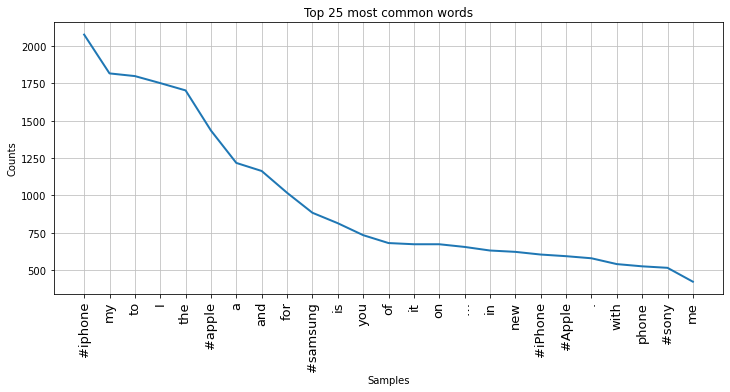

<AxesSubplot:title={'center':'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [21]:
all_words = []
for line in list(data['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

From above plot, we can infer that most of the tweets are related to iphone, apple, samsung, sony but punctuations are also included in top common words.

Let us visualize the same plot after preprocessing

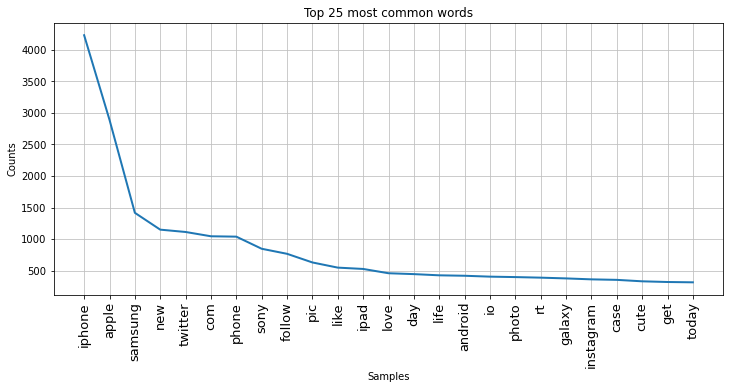

<AxesSubplot:title={'center':'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [22]:
all_words = []
for line in list(data['cleaned_tweets']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)   

From the above plot, we can observe a few more common words like instagram, love, cute, twitter, phone, rt (which stands for re-tweeted)

**Model building**

Bag of Words features

Here, frequency of every word in vocabulary is used to build the feature space.



In [51]:
from sklearn.feature_extraction import text
sklearn_stop_words = text.ENGLISH_STOP_WORDS
sklearn_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [52]:
len(sklearn_stop_words)

318

In [56]:
nltk_stop_words = stop_words.copy()

In [24]:
data.head()

,label,tweet,cleaned_tweets
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love would go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george made way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,amazing service apple even talk question unless pay stupid support


In [116]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=10)
features= vectorizer.fit_transform(data['cleaned_tweets'])
features.shape

(7920, 1098)

Every word in the vocabulary is a feature

In [117]:
vectorizer.get_feature_names()

['able',
 'access',
 'accessory',
 'account',
 'actually',
 'ad',
 'add',
 'added',
 'adorable',
 'adventure',
 'ago',
 'agree',
 'air',
 'al',
 'aliusaexpress',
 'amazing',
 'amazon',
 'america',
 'android',
 'angry',
 'animal',
 'annoying',
 'answer',
 'anymore',
 'app',
 'apparently',
 'apple',
 'applestore',
 'applesucks',
 'appletv',
 'applewatch',
 'appointment',
 'apps',
 'appstore',
 'april',
 'arrived',
 'art',
 'artist',
 'asian',
 'ask',
 'asshole',
 'att',
 'august',
 'available',
 'away',
 'awesome',
 'babe',
 'baby',
 'backup',
 'bad',
 'bag',
 'ball',
 'banana',
 'bar',
 'battery',
 'bbm',
 'bday',
 'beach',
 'bear',
 'beat',
 'beautiful',
 'beauty',
 'bed',
 'believe',
 'best',
 'bestfriend',
 'bestfriends',
 'bestoftheday',
 'bestprice',
 'better',
 'big',
 'bird',
 'birthday',
 'bit',
 'bitch',
 'black',
 'blackandwhite',
 'blackberry',
 'blackfriday',
 'blast',
 'blessed',
 'block',
 'blog',
 'blogger',
 'blonde',
 'blow',
 'blue',
 'bluetooth',
 'book',
 'boostmobil

In [86]:
len(vectorizer.get_feature_names() )

2127

In [87]:
vectorizer.vocabulary_

{'fingerprint': 620,
 'test': 1864,
 'android': 51,
 'apps': 80,
 'beautiful': 139,
 'cute': 409,
 'health': 809,
 'igers': 879,
 'iphoneonly': 953,
 'iphonesia': 957,
 'iphone': 948,
 'finally': 616,
 'case': 265,
 'thanks': 1875,
 'yay': 2098,
 'sony': 1713,
 'xperia': 2093,
 'love': 1100,
 'talk': 1842,
 'relax': 1511,
 'smartphone': 1686,
 'wifi': 2051,
 'connect': 357,
 'wired': 2061,
 'know': 1018,
 'way': 2034,
 'home': 840,
 'amazing': 46,
 'service': 1623,
 'apple': 68,
 'question': 1476,
 'pay': 1346,
 'stupid': 1797,
 'support': 1816,
 'software': 1707,
 'update': 1961,
 'fucked': 684,
 'phone': 1357,
 'big': 160,
 'time': 1893,
 'iphones': 956,
 'happy': 786,
 'instapic': 933,
 'instadaily': 912,
 'xperiaz': 2094,
 'new': 1254,
 'type': 1948,
 'charger': 289,
 'cable': 240,
 'uk': 1952,
 'amazon': 47,
 'year': 2102,
 'cross': 399,
 'young': 2112,
 'newyear': 1261,
 'starting': 1759,
 'recipe': 1499,
 'technology': 1859,
 'samsunggalaxys': 1582,
 'iphonex': 958,
 'pic': 1371

In [27]:
type(features)

scipy.sparse.csr.csr_matrix

In [39]:
features[0].todense().shape

(1, 15888)

In [28]:
df = pd.DataFrame(features.todense())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
vectorizer.inverse_transform(features[0])

[array(['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful',
        'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone'],
       dtype='<U41')]

Split the dataset into training and validation set

In [118]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(features,data['label'],test_size=0.3,random_state=42) 

Training Logistic Regression

In [119]:
lr = LogisticRegression()           #instantiate model
lr.fit(xtrain_bow, ytrain)          #training model

LogisticRegression()

In [120]:
prediction = lr.predict(xvalid_bow) #predicting on validation set

In [121]:
lr.score(xtrain_bow, ytrain)  # training set accuracy

0.9227994227994228

In [122]:
lr.score(xvalid_bow, yvalid)  # validation set accuracy

0.8758417508417509

In [123]:
f1_score(yvalid, prediction)        #calculating f1 score for Y=1 class (default)

0.7611336032388664

In [130]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
LR = LogisticRegression() 

In [131]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_val_score(LR, features,data['label'], cv=kfold, scoring='accuracy') 
print(cv_results.mean(), cv_results.std())

0.8768939393939392 0.006133817071460157


We observe that removal of stop words and lemmatization increased the performance of the model. 

We can infer that improving pre-processing can increase the performance of the model

In [134]:
import numpy as np
LR.fit( features,data['label'])
feature_names = np.array(vectorizer.get_feature_names())
coef = LR.coef_

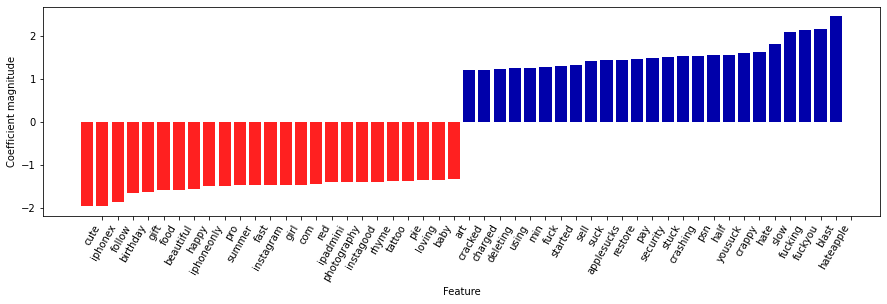

In [135]:
import mglearn
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

# Dimensionality REductiuon using PCA

In [136]:
from sklearn.decomposition import PCA

In [137]:
vectorizer = CountVectorizer()
features= vectorizer.fit_transform(data['cleaned_tweets'])
features.shape

(7920, 15888)

In [141]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(features.todense(),data['label'],test_size=0.3,random_state=42) 

In [147]:
xtrain_bow.shape

(5544, 15888)

In [153]:
pca = PCA(n_components = 1098)
Xtrain_pca = pca.fit_transform(xtrain_bow)
Xtest_pca = pca.transform(xvalid_bow)
Xtrain_pca.shape, Xtest_pca.shape

((5544, 1098), (2376, 1098))

In [154]:
np.cumsum(pca.explained_variance_ratio_)

array([0.04254012, 0.07537078, 0.10379538, ..., 0.81143675, 0.8115656 ,
       0.8116942 ])

In [156]:
X_pca = pca.fit_transform(features.todense())

In [161]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_val_score(LR, X_pca,data['label'], cv=kfold, scoring='accuracy') 
print(cv_results.mean(), cv_results.std())

0.8799242424242424 0.005362818328685678


## Supervised Dimensionality Reduction using LDA (better choice for Classification problems)

In [ ]:
LDA intends to find the direction of maximum separability between the classes in the dataset
whereas PCA inteds to fiund the diections of maximum variance in your dataset

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

In [166]:
X_lda = LDA.fit_transform(features.todense(), data['label'])
X_lda.shape   # 7920 x 1 will be the dimesnions

(7920, 1)

In [167]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_val_score(LR, X_lda,data['label'], cv=kfold, scoring='accuracy') 
print(cv_results.mean(), cv_results.std())

0.9992424242424243 0.0009278370237814909


In [168]:
cv_results

array([0.99747475, 1.        , 1.        , 0.99936869, 0.99936869])

In [171]:
from sklearn.pipeline import make_pipeline
LDA = LinearDiscriminantAnalysis()
LR = LogisticRegression() 
pipeline = make_pipeline(LDA, LR)
pipeline

Pipeline(steps=[('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# Crossvalidating the pipeline
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_val_score(pipeline, features.todense(), data['label'], cv=kfold, scoring='accuracy') 
print(cv_results.mean(), cv_results.std())

In [158]:
path = r'D:\OneDrive\Google Drive Files\Training\1 MASTER\4. Supervised ML Algorithms\0. Feature Engineeing'
filename = r'\hist_df_latest.csv'
fname = path + filename

In [159]:
df = pd.read_csv(fname)

In [160]:
df.head()

,date,open,high,low,close,volume,RSI_14,EMA_3,EMA_7,EMA_10,EMA_14,EMA_21
0,2020-05-08 09:15:00+05:30,536.90,537.05,532.80,535.60,1269786,65.828950,532.481561,530.941617,530.518343,530.260484,530.270784
1,2020-05-08 09:20:00+05:30,536.00,536.90,532.60,533.95,753357,59.676243,533.215780,531.693713,531.142281,530.752419,530.605258
2,2020-05-08 09:25:00+05:30,533.95,535.40,532.40,533.35,559002,57.569115,533.282890,532.107784,531.543684,531.098763,530.854780
3,2020-05-08 09:30:00+05:30,533.35,540.60,533.25,540.00,1564095,70.149544,536.641445,534.080838,533.081196,532.285595,531.686164
4,2020-05-08 09:35:00+05:30,540.05,542.40,537.25,542.00,1190193,72.764925,539.320723,536.060629,534.702797,533.580849,532.623785
